<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Learning-Recommender_Systems/blob/main/HW04_AdaBoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings


iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")

Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state = 123,
                                   test_size = 0.25,
                                   shuffle=True)
print('X_train : ')
print(X_train[0:5])
print('')
print('X_test : ')
print(X_test[0:5])
print('')
print('y_train : ')
print(y_train[0:5])
print('')
print('y_test : ')
print(y_test[0:5])

X_train : 
[[5.4 3.9 1.3 0.4]
 [5.8 2.7 3.9 1.2]
 [5.  2.  3.5 1. ]
 [5.  3.2 1.2 0.2]
 [6.8 3.2 5.9 2.3]]

X_test : 
[[6.3 2.5 4.9 1.5]
 [6.8 3.  5.5 2.1]
 [6.4 2.8 5.6 2.2]
 [5.6 3.  4.1 1.3]
 [4.9 3.6 1.4 0.1]]

y_train : 
[0 1 1 0 2]

y_test : 
[1 2 2 1 0]


In [ ]:
#AdaBoost model fit

In [ ]:
clf = AdaBoostClassifier(n_estimators=50,
                        learning_rate=1)
                        #base_estimator=DecisionTreeClassifier
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))
print("Precision: ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("F1 score: ", metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy:  0.9473684210526315
Recall:  0.9473684210526315
Precision:  0.9578947368421052
F1 score:  0.948268106162843


In [ ]:
#GridSearchCV

In [ ]:
parameters = { 'n_estimators' : np.arange(1,21),#I checked (20,70) and best was 20
               'learning_rate' : np.arange(0.1, 1.1, 0.1) }
model = AdaBoostClassifier()
grid = GridSearchCV( model, parameters )
grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

Best params: {'learning_rate': 0.9, 'n_estimators': 5}
Old accuracy: 0.9473684210526315
New accuracy: 0.9473684210526315
Both results are the same.

New model evaluation
Precision: 0.9578947368421052
Recall: 0.9473684210526315
F1 Score: 0.948268106162843
Confusion Matrix:
 [[16  0  0]
 [ 0  8  0]
 [ 0  2 12]]


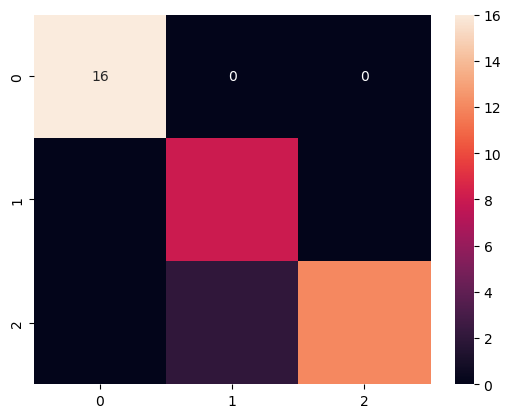

In [ ]:
print("Best params:", grid.best_params_)
y_pred_new = AdaBoostClassifier(n_estimators=5, learning_rate=0.9).fit(X_train,y_train).predict(X_test)
print("Old accuracy:", metrics.accuracy_score(y_test, y_pred))
print("New accuracy:", metrics.accuracy_score(y_test, y_pred_new))
assert metrics.accuracy_score(y_test, y_pred_new) ==  metrics.accuracy_score(y_test, y_pred)
assert metrics.f1_score(y_test, y_pred, average='weighted') == metrics.f1_score(y_test, y_pred_new, average='weighted')
assert metrics.recall_score(y_test, y_pred, average='weighted') == metrics.recall_score(y_test, y_pred_new, average='weighted')
print("Both results are the same.\n")
print("New model evaluation")

print("Precision:", metrics.precision_score(y_test, y_pred_new, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_new, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, y_pred_new, average='weighted'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_new))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_new), annot=True, fmt='d')
plt.show()

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation scores for Ada with Decision Tree base\n")
for i in range(5):
    print(f"Cross-validation set {i+1} score: {cv_scores[i]}")
print("\nMean Ada with Tree-based cross-validation score:", cv_scores.mean())


Cross-Validation scores for Ada with Decision Tree base

Cross-validation set 1 score: 0.9666666666666667
Cross-validation set 2 score: 0.9333333333333333
Cross-validation set 3 score: 0.9
Cross-validation set 4 score: 0.9333333333333333
Cross-validation set 5 score: 1.0

Mean Ada with Tree-based cross-validation score: 0.9466666666666667


In [ ]:
warnings.filterwarnings('ignore')

base_estimator = SVC(probability=True)
model_with_svc = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=5, learning_rate=0.9)

model_with_svc.fit(X_train, y_train)

y_pred_svc = model_with_svc.predict(X_test)
print("Accuracy with SVC base_estimator:", metrics.accuracy_score(y_test, y_pred_svc))
if metrics.accuracy_score(y_test, y_pred_svc) < metrics.accuracy_score(y_test, y_pred):
    print("Tree base classifier was better")
else:
    print("Now we got better results")

Accuracy with SVC base_estimator: 1.0
Now we got better results


In [ ]:
#Compare SVM estimator with linear kernel using Cross-Validation

In [ ]:
cv_scores_svc = cross_val_score(model_with_svc, X, y, cv=5)
print("Cross-Validation scores for Ada with svc linear base\n")
for i in range(5):
    print(f"Cross-validation set {i+1} score: {cv_scores_svc[i]}")
print("\nMean Ada with SVC with linear kernel cross-validation score:", cv_scores_svc.mean())

Cross-Validation scores for Ada with svc linear base

Cross-validation set 1 score: 0.9666666666666667
Cross-validation set 2 score: 1.0
Cross-validation set 3 score: 1.0
Cross-validation set 4 score: 0.9666666666666667
Cross-validation set 5 score: 1.0

Mean Ada with SVC with linear kernel cross-validation score: 0.9866666666666667
